# Distribution B - Sample Error vs. H

In [1]:
import DistBTrunc as dbt
import DistExampB as db

from math import floor, ceil
from matplotlib import pyplot as plot
from numpy import sinc
from sympy import Symbol
from scipy.linalg import lstsq

from LocUtil import Grid1, LogGrid1, MinMax, SetSeed
from Map import LogRatio

In [2]:
nSamp = 100

givenSeed = None
seedDig = 3

nPlot = 101
figSize = (9, 6.5)

dist = db.ExampB()

In [307]:
seed = SetSeed(givenSeed, seedDig)
if givenSeed is None:
	print(f'seed = {seed}')

samp = sorted(tuple(dist.Sample() for _ in range(nSamp)))
quant = tuple((k + 0.5) / nSamp for k in range(nSamp))

seed = 770


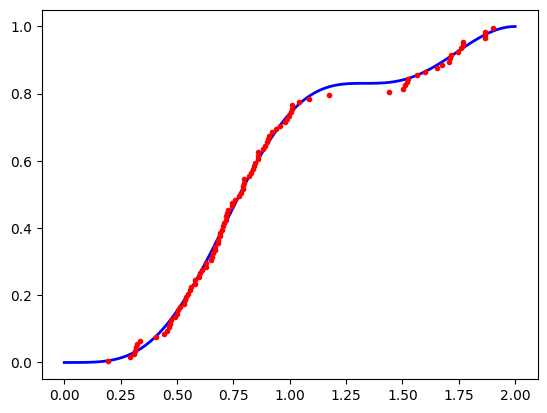

In [308]:
plot.plot(samp,quant, '.', c='red')

xGrid = Grid1(0,2,nPlot)
cdfX = tuple(dist.Cdf(x) for x in xGrid)
plot.plot(xGrid, cdfX, c="blue", lw=2, zorder=-1)

## Map to Z

In [309]:
xSym = Symbol('x')
zSym = Symbol('z')

map_ = LogRatio(xSym, zSym, (0, 2))

In [310]:
map_.forSym

log(x/(2 - x))

In [311]:
sampZ = tuple(map_.Forward(x) for x in samp)

In [312]:
zRange = MinMax(sampZ)
zRange

(-2.2218261934789107, 2.960986526282741)

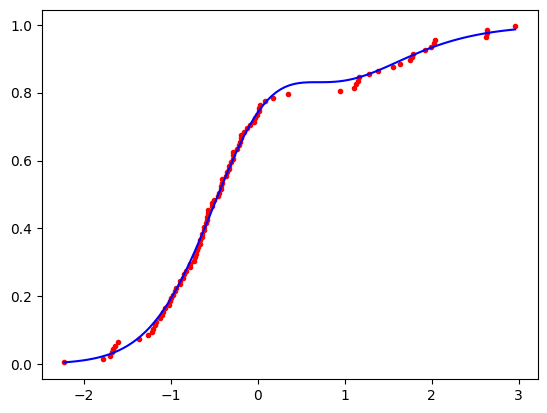

In [313]:
plot.plot(sampZ,quant, '.', c='red')

zGrid = Grid1(*zRange, nPlot)
nullGrid = [dist.Cdf(map_.Inverse(z)) for z in zGrid]
plot.plot(zGrid,nullGrid, c='blue')

## Residue

In [314]:
import DistBTrunc

In [315]:
import importlib
importlib.reload(DistBTrunc)

<module 'DistBTrunc' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\CdfFit\\Note Books\\DistBTrunc.py'>

In [316]:
sampRes = [q - DistBTrunc.NullZ(z) for (z,q) in zip(sampZ, quant)]

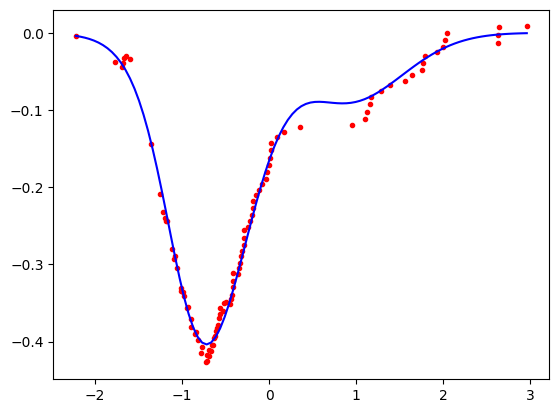

In [317]:
plot.plot(sampZ,sampRes, '.', c='red')

resGrid = tuple(dbt.ResZ(z) for z in zGrid)
plot.plot(zGrid,resGrid, c='blue')

### Fit sinc

In [318]:
import SincFit

In [319]:
import importlib
importlib.reload(SincFit)

<module 'SincFit' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\CdfFit\\SincFit.py'>

In [320]:
hGrid = LogGrid1(3, 0.2, 21)

In [321]:
fitTab = tuple((h, *SincFit.Fit(sampZ, sampRes, h)) for h in hGrid)

Text(0, 0.5, 'Residue')

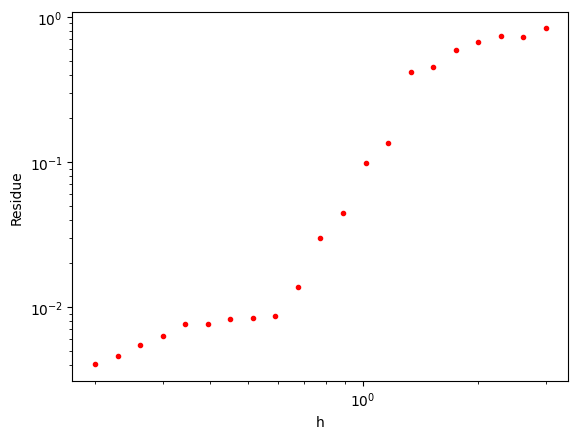

In [322]:
res = tuple(r for (_,_,_,r,_) in fitTab)
plot.loglog(hGrid, res, '.', c='red')

plot.xlabel('h')
plot.ylabel('Residue')

Text(0, 0.5, 'Condition Number')

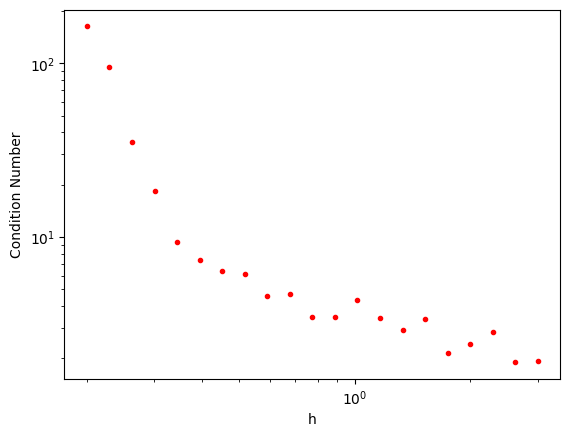

In [323]:
cond = tuple(c for (_,_,_,_,c) in fitTab)
plot.loglog(hGrid, cond, '.', c='red')

plot.xlabel('h')
plot.ylabel('Condition Number')

In [324]:
# nL = tuple(len(sp) for (_,sp,_,_,_) in fitTab)
# plot.loglog(hGrid, nL, '.', c='red')
# 
# plot.xlabel('h')
# plot.ylabel('n')

#### Individual fits

In [325]:
h = 0.8

In [326]:
fitRes = SincFit.Fit(sampZ, sampRes, h)

In [327]:
sincPoint,sincVal = fitRes[1],fitRes[0]

In [328]:
MinMax(sampZ)

(-2.2218261934789107, 2.960986526282741)

In [329]:
def Interp(sincPoint, sincVal, grid):
	h = sincPoint[1] - sincPoint[0]    # TODO:  the goal is to make an ADT (automatic data type)
	
	result = []
	for z in grid:
		val = 0
		for (sp,sv) in zip(sincPoint,sincVal):
			val += sv * sinc((z - sp)/h)
		result.append(val)
	
	return result

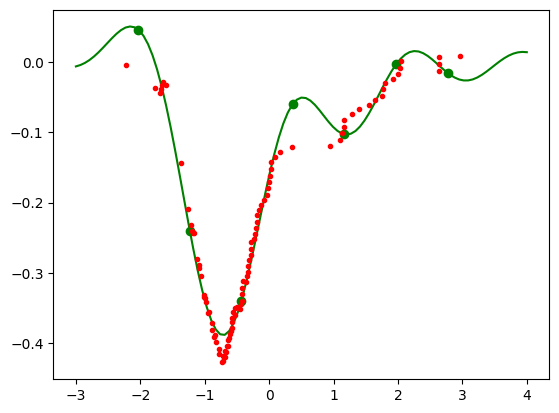

In [330]:
zGrid = Grid1(-3,4, nPlot)
interp = Interp(sincPoint,sincVal,zGrid)

plot.plot(zGrid,interp, c='green')	
plot.plot(sincPoint,sincVal, 'o', markersize=6, c='green')

plot.plot(sampZ,sampRes, '.', c='red')